# Multipe Regression

In this notebook we use a different data set to practice what we have learned so far:
* Upload and preprocess the data
* Write a function to compute the Multiple Regression weights
* Write a function to make predictions of the output given the input feature
* Compare different models for predicting the output

Look at the Multiple Regression notebook on insurance data!

# Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Upload, preprocess and check the data

Dataset on insurance data (insurance.csv) is obtained from the Machine Learning course website (Spring 2017) from Professor Eric Suess at http://www.sci.csueastbay.edu/~esuess/stat6620/#week-6.

In [2]:
# Import dataset
data = pd.read_csv('insurance.csv')

# Look at the table to check potential features
data[:10]

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [3]:
# Check if the dataset contains NaN values
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
expenses    False
dtype: bool

In [4]:
# Check some statistics of the data
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


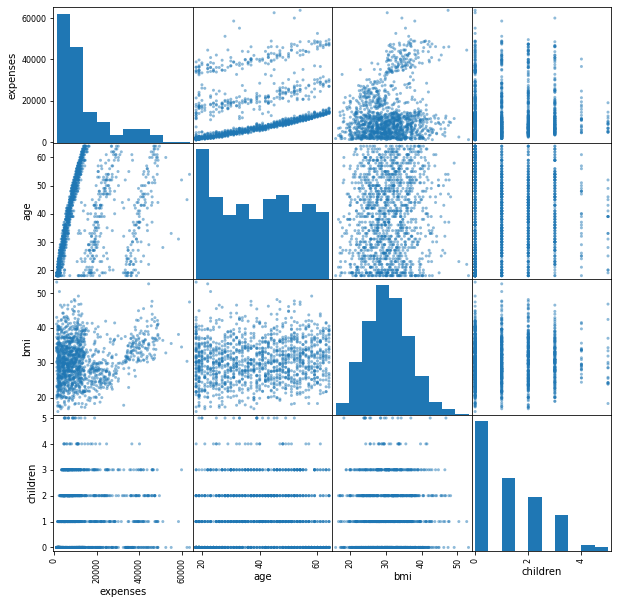

In [5]:
# Plot Scatter Matrix for relevant variables
plot_data_new = data[['expenses', 'age', 'bmi', 'children']] 
from pandas.plotting import scatter_matrix
sm = scatter_matrix(plot_data_new, figsize = (10,10))

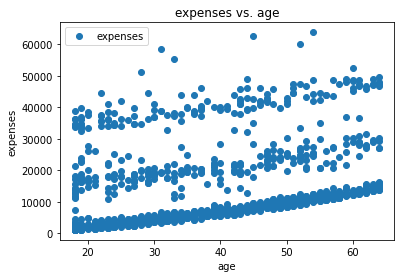

In [6]:
# Plot some feature relations
data.plot(x='age', y='expenses', style='o')
plt.title('expenses vs. age')
plt.xlabel('age')
plt.ylabel('expenses')
plt.show()

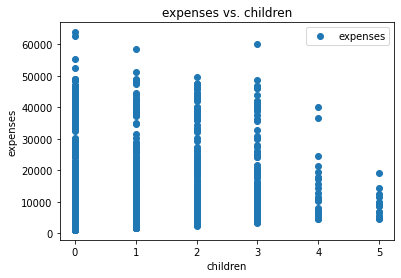

In [7]:
# Plot some feature relations
data.plot(x='children', y='expenses', style='o')
plt.title('expenses vs. children')
plt.xlabel('children')
plt.ylabel('expenses')
plt.show()

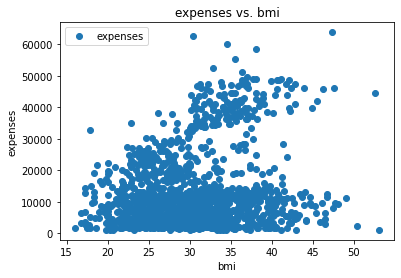

In [8]:
# Plot some feature relations
data.plot(x='bmi', y='expenses', style='o')
plt.title('expenses vs. bmi')
plt.xlabel('bmi')
plt.ylabel('expenses')
plt.show()

In [9]:
# Divide the data into some 'attributes' (X) and 'labels' (y).
X = data[['bmi','children', 'age']]
y = data['expenses']

# Split data into training and testing

In [10]:
# Split data set into 80% train and 20% test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Look at the shape to check the split ratio
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 3), (268, 3), (1070,), (268,))

# Use a pre-build multiple regression function 



In [11]:
# Train a Sklearn built-in function
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [12]:
X.columns

Index(['bmi', 'children', 'age'], dtype='object')

In [13]:
# See intercept and coefficients chosen by the model

print('Intercept:', reg.intercept_)
coeff_df = pd.DataFrame({'Features': X.columns, 'Coefficients': reg.coef_}).set_index('Features')
coeff_df

Intercept: -5306.210865241597


,Coefficients
Features,
bmi,298.611754
children,660.430487
age,220.459279


In [14]:
# Do prediction on test data
y_pred = reg.predict(X_test)

In [15]:
# Check differences between actual and predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_pred - y_test},
                   columns=['Actual', 'Predicted', 'Difference']).astype(int)
df.head()

,Actual,Predicted,Difference
578,9724,15836,6111
610,8547,14494,5947
569,45702,18720,-26981
1034,12950,19608,6658
198,9644,11342,1697


In [16]:
# Evaluate the performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9015.646567040227
Mean Squared Error: 133177898.6236016
Root Mean Squared Error: 11540.272900742062


# Check for overfitting

In [17]:
# If r2 and RMSE in train and test differ dramatically => Overfitting!
# => Compare r2 and RSME in Test and Train!

# "Prework" needed to do the comparison
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
from sklearn.metrics import r2_score

# => Compare r2 and RSME in Test and Train!
print('RSME Train:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RSME Test: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R-2 Train:', r2_score(y_train, y_pred_train))
print('R-2 Test: ', r2_score(y_test, y_pred_test))

RSME Train: 11316.147650110192
RSME Test:  11540.272900742062
R-2 Train: 0.10679614876313426
R-2 Test:  0.16308722661533448


# Additional task: What is the best combination of input features showing the least MSE
## (1) bmi + age + children
## (2) bmi + age
## (3) bmi + children
## (4) age + children

# For more information on performance evaluation see also
* https://en.wikipedia.org/wiki/Mean_absolute_error
* https://en.wikipedia.org/wiki/Mean_squared_error
* https://en.wikipedia.org/wiki/Root-mean-square_deviation